In [3]:
from ThinFilmClasses import ThinFilmLayer, ThinFilmSystem
from DataProcessing import process_data, data_smoothing, plot_reflectance, plot_nk, extract_layer_thicknesses
from Optimization import optimize_nk
import os
import matplotlib.pyplot as plt
import numpy as np

nk data found for air.
nk data found for sio2.
nk data found for w.
nk data found for si3n4.
nk data found for bi2o3_k.
R at wavelength 980nm = 0.5695547942310613
T at wavelength 980nm = 0.08949845569442695
A at wavelength 980nm = 0.3409467500745118
B01 = [[ 1.22515141-7.24984666e-09j -0.22515141+7.24984666e-09j]
 [-0.22515141+7.24984666e-09j  1.22515141-7.24984666e-09j]]
M = [[ 1.22515141-7.24984666e-09j -0.22515141+7.24984666e-09j]
 [-0.22515141+7.24984666e-09j  1.22515141-7.24984666e-09j]]
P1 = [[0.72634258+0.68733286j 0.        +0.j        ]
 [0.        +0.j         0.72634258-0.68733286j]]
M = [[ 0.88987964+0.84208682j -0.16353705+0.15475397j]
 [-0.16353706-0.15475396j  0.88987963-0.84208683j]]
B12 = [[ 1.55786555+1.15038232j -0.55786555-1.15038232j]
 [-0.55786555-1.15038232j  1.55786555+1.15038232j]]
M = [[ 0.68684897+2.43735807j  0.03949362-1.44051729j]
 [-1.54189753-0.98314657j  2.2682401 -0.01369422j]]
M_cal = [[-4.43334506+1.9174414j  -1.65207999+2.69839808j]
 [ 1.69111313-3.

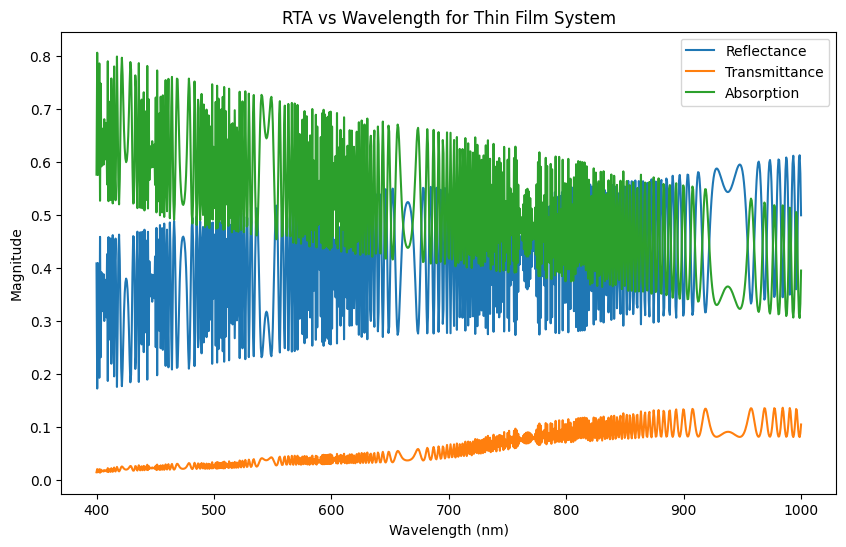

In [7]:
# Create multilayer system
n_points = 10 # Number of points used to fit the n_spline and k_spline
left = 400
right = 1000
wavelength_range = np.linspace(left, right, 1000)
thickness = [500000, 50, 50]
air = ThinFilmLayer("air", 1, 0, left, right)
layer1 = ThinFilmLayer("sio2", thickness[0], n_points, left, right)
layer2 = ThinFilmLayer("w", thickness[1], 0, left, right)
layer3 = ThinFilmLayer("si3n4", thickness[2], 0, left, right)
substrate = ThinFilmLayer("bi2o3_k", 1, 0, left, right)


multilayer = ThinFilmSystem([air, layer1, layer2, layer3, substrate])
R, T, A = multilayer.calculate_RTA_single(980)
print(f'R at wavelength 980nm = {R}')
print(f'T at wavelength 980nm = {T}')
print(f'A at wavelength 980nm = {A}')
multilayer.print_matrices(980)
multilayer.plot_RTA(wavelength_range)

# multilayer2 = ThinFilmSystem([air, layer1, substrate])
# multilayer2.print_matrices(980)
# multilayer2.calculate_propagation_matrix(980, layer_index=1, debug=True)
# layer1.plot_n(left, right)
# layer1.plot_k(left, right)
